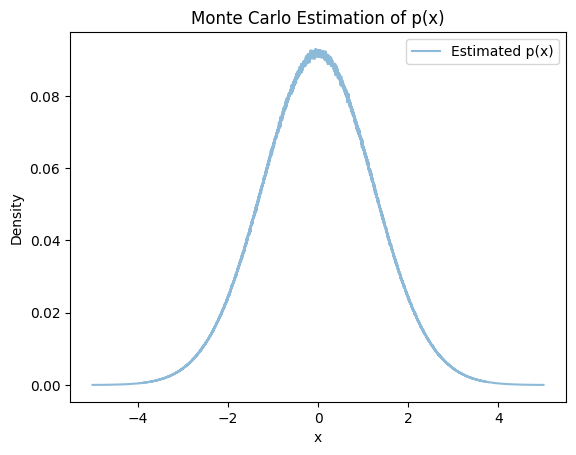

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Number of samples for Monte Carlo estimation
num_samples = 10000

# Define the prior distribution p(z) = N(0, 1)
def sample_p_z(n_samples):
    return np.random.normal(0, 1, n_samples)

# Define the conditional distribution p(x|z) = N(z, 1)
def p_x_given_z(x, z):
    return norm.pdf(x, z, 1)

# Monte Carlo estimation of p(x)
def monte_carlo_estimation(x_values, num_samples_per_x):
    p_x_estimated = []
    for x in x_values:
        z_samples = sample_p_z(num_samples_per_x)
        likelihoods = p_x_given_z(x, z_samples) * norm.pdf(z_samples, 0, 1)
        p_x_estimated.append(np.mean(likelihoods))
    return p_x_estimated

# Define the range of x values to estimate p(x)
x_values = np.linspace(-5, 5, num_samples)

# Perform Monte Carlo estimation
p_x_estimated = monte_carlo_estimation(x_values, num_samples)

# Plot the estimated distribution
plt.plot(x_values, p_x_estimated, alpha=0.5, label='Estimated p(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Monte Carlo Estimation of p(x)')
plt.show()

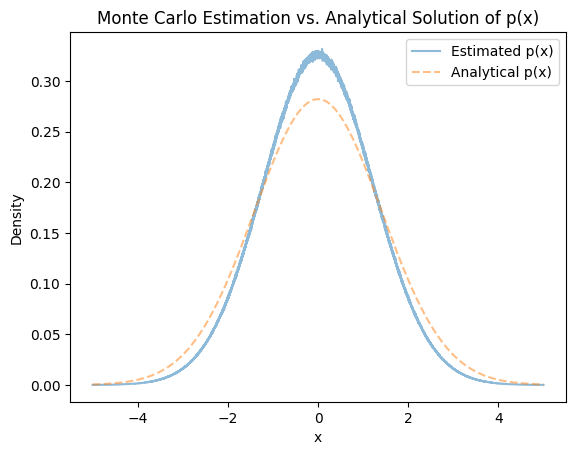

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Number of samples for Monte Carlo estimation
num_samples = 10000

# Define the prior distribution p(z) = N(0, 1)
def sample_p_z(n_samples):
    return np.random.normal(0, 1, n_samples)

# Define the conditional distribution p(x|z) = N(z, 1)
def p_x_given_z(x, z):
    return norm.pdf(x, z, 1)

# Monte Carlo estimation of p(x)
def monte_carlo_estimation(x_values, num_samples_per_x):
    p_x_estimated = []
    for x in x_values:
        z_samples = sample_p_z(num_samples_per_x)
        likelihoods = p_x_given_z(x, z_samples) * norm.pdf(z_samples, 0, 1)
        p_x_estimated.append(np.mean(likelihoods))
    p_x_estimated = np.array(p_x_estimated)
    normalization_factor = np.trapz(p_x_estimated, x_values)
    p_x_estimated /= normalization_factor
    return p_x_estimated

# Define the range of x values to estimate p(x)
x_values = np.linspace(-5, 5, num_samples)

# Perform Monte Carlo estimation
p_x_estimated = monte_carlo_estimation(x_values, num_samples)

# Analytical solution
analytical_p_x = norm.pdf(x_values, 0, np.sqrt(2))

# Plot the estimated distribution and the analytical solution
plt.plot(x_values, p_x_estimated, alpha=0.5, label='Estimated p(x)')
plt.plot(x_values, analytical_p_x, alpha=0.5, label='Analytical p(x)', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Monte Carlo Estimation vs. Analytical Solution of p(x)')
plt.show()